# Data analysis
## Developed by *Kaustubh Joshi*
### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

The data consist of the number of people present at different times in gym and also includes additional factor. Using this dataset interesting insights into attendace of the gym shall be derived. Also a predictive model shall ve developed which will, predict the number of people attending the gym given the values of other factors.
_____________________________________________________________________________________________


## Basic to do list -  These questions are necesssary to get one started on right path

Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?
    1. How attendace is affected by time of the week
    2. How attendace is affected by time of the temperature
    3. How attendace is affected by the start of the semester
    4. Create a model predicting the number of people attending the gym
    
Did you define the metric for success before beginning?
    1. Logical reasoning shall match
    2. Logical reasoning shall match
    3. Logical reasoning shall match
    4. 90% accuracy
    
Did you understand the context for the question and the scientific or business application?
    
    This data from university gym. This data consists of information about attendace of the gym and other factors taken at the same timestamp. using this data pedictive model can be developed which will predict the attendace of the gym which might be useful for the gym owner.
    
Did you record the experimental design?
    
    Dataset is available
    
Did you consider whether the question could be answered with the available data?
    
    Dataset consists of the 26066 records. So question shall be answered failry well
    
# -----------------------------------------------------------------------------------------------------------------

## Lets start analysis

The dataset is a .csv file which will be read using panda library. Below section will check basic data validity

In [43]:
import pandas as pd

Gym_data = pd.read_csv('D:\LocalHome\joshik\Downloads\Gym_data.csv')
Gym_data.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


Below section will give data disctribution overview

In [44]:
Gym_data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
count,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000,26066.000000
mean,41.055743,49427.729801,3.016458,0.291759,0.011509,59.013831,59.160459,0.100169
std,24.768592,22472.238011,2.005325,0.454581,0.106664,6.951850,6.661657,0.300231
min,0.000000,9.000000,0.000000,0.000000,0.000000,32.320000,38.140000,0.000000
25%,24.000000,31818.000000,1.000000,0.000000,0.000000,54.550000,54.550000,0.000000
50%,43.000000,49824.500000,3.000000,0.000000,0.000000,58.800000,58.800000,0.000000
75%,58.000000,68413.000000,5.000000,1.000000,0.000000,63.530000,63.530000,0.000000
max,138.000000,86120.000000,6.000000,1.000000,1.000000,87.170000,87.170000,1.000000


The dataset seems very clean because
1. Number of rows for all the data columns are same
2. Maximum number of people = 138 and min = 0 , looks reasonable
3. Maximum timestampvalue = 86120 which equal around 23 hours is reasonable
4. max day of the week = 6  and min = 0 , seems reasonable
5. apperant temperature and actual temperature ranges are logical


Below we plot pair plot , to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

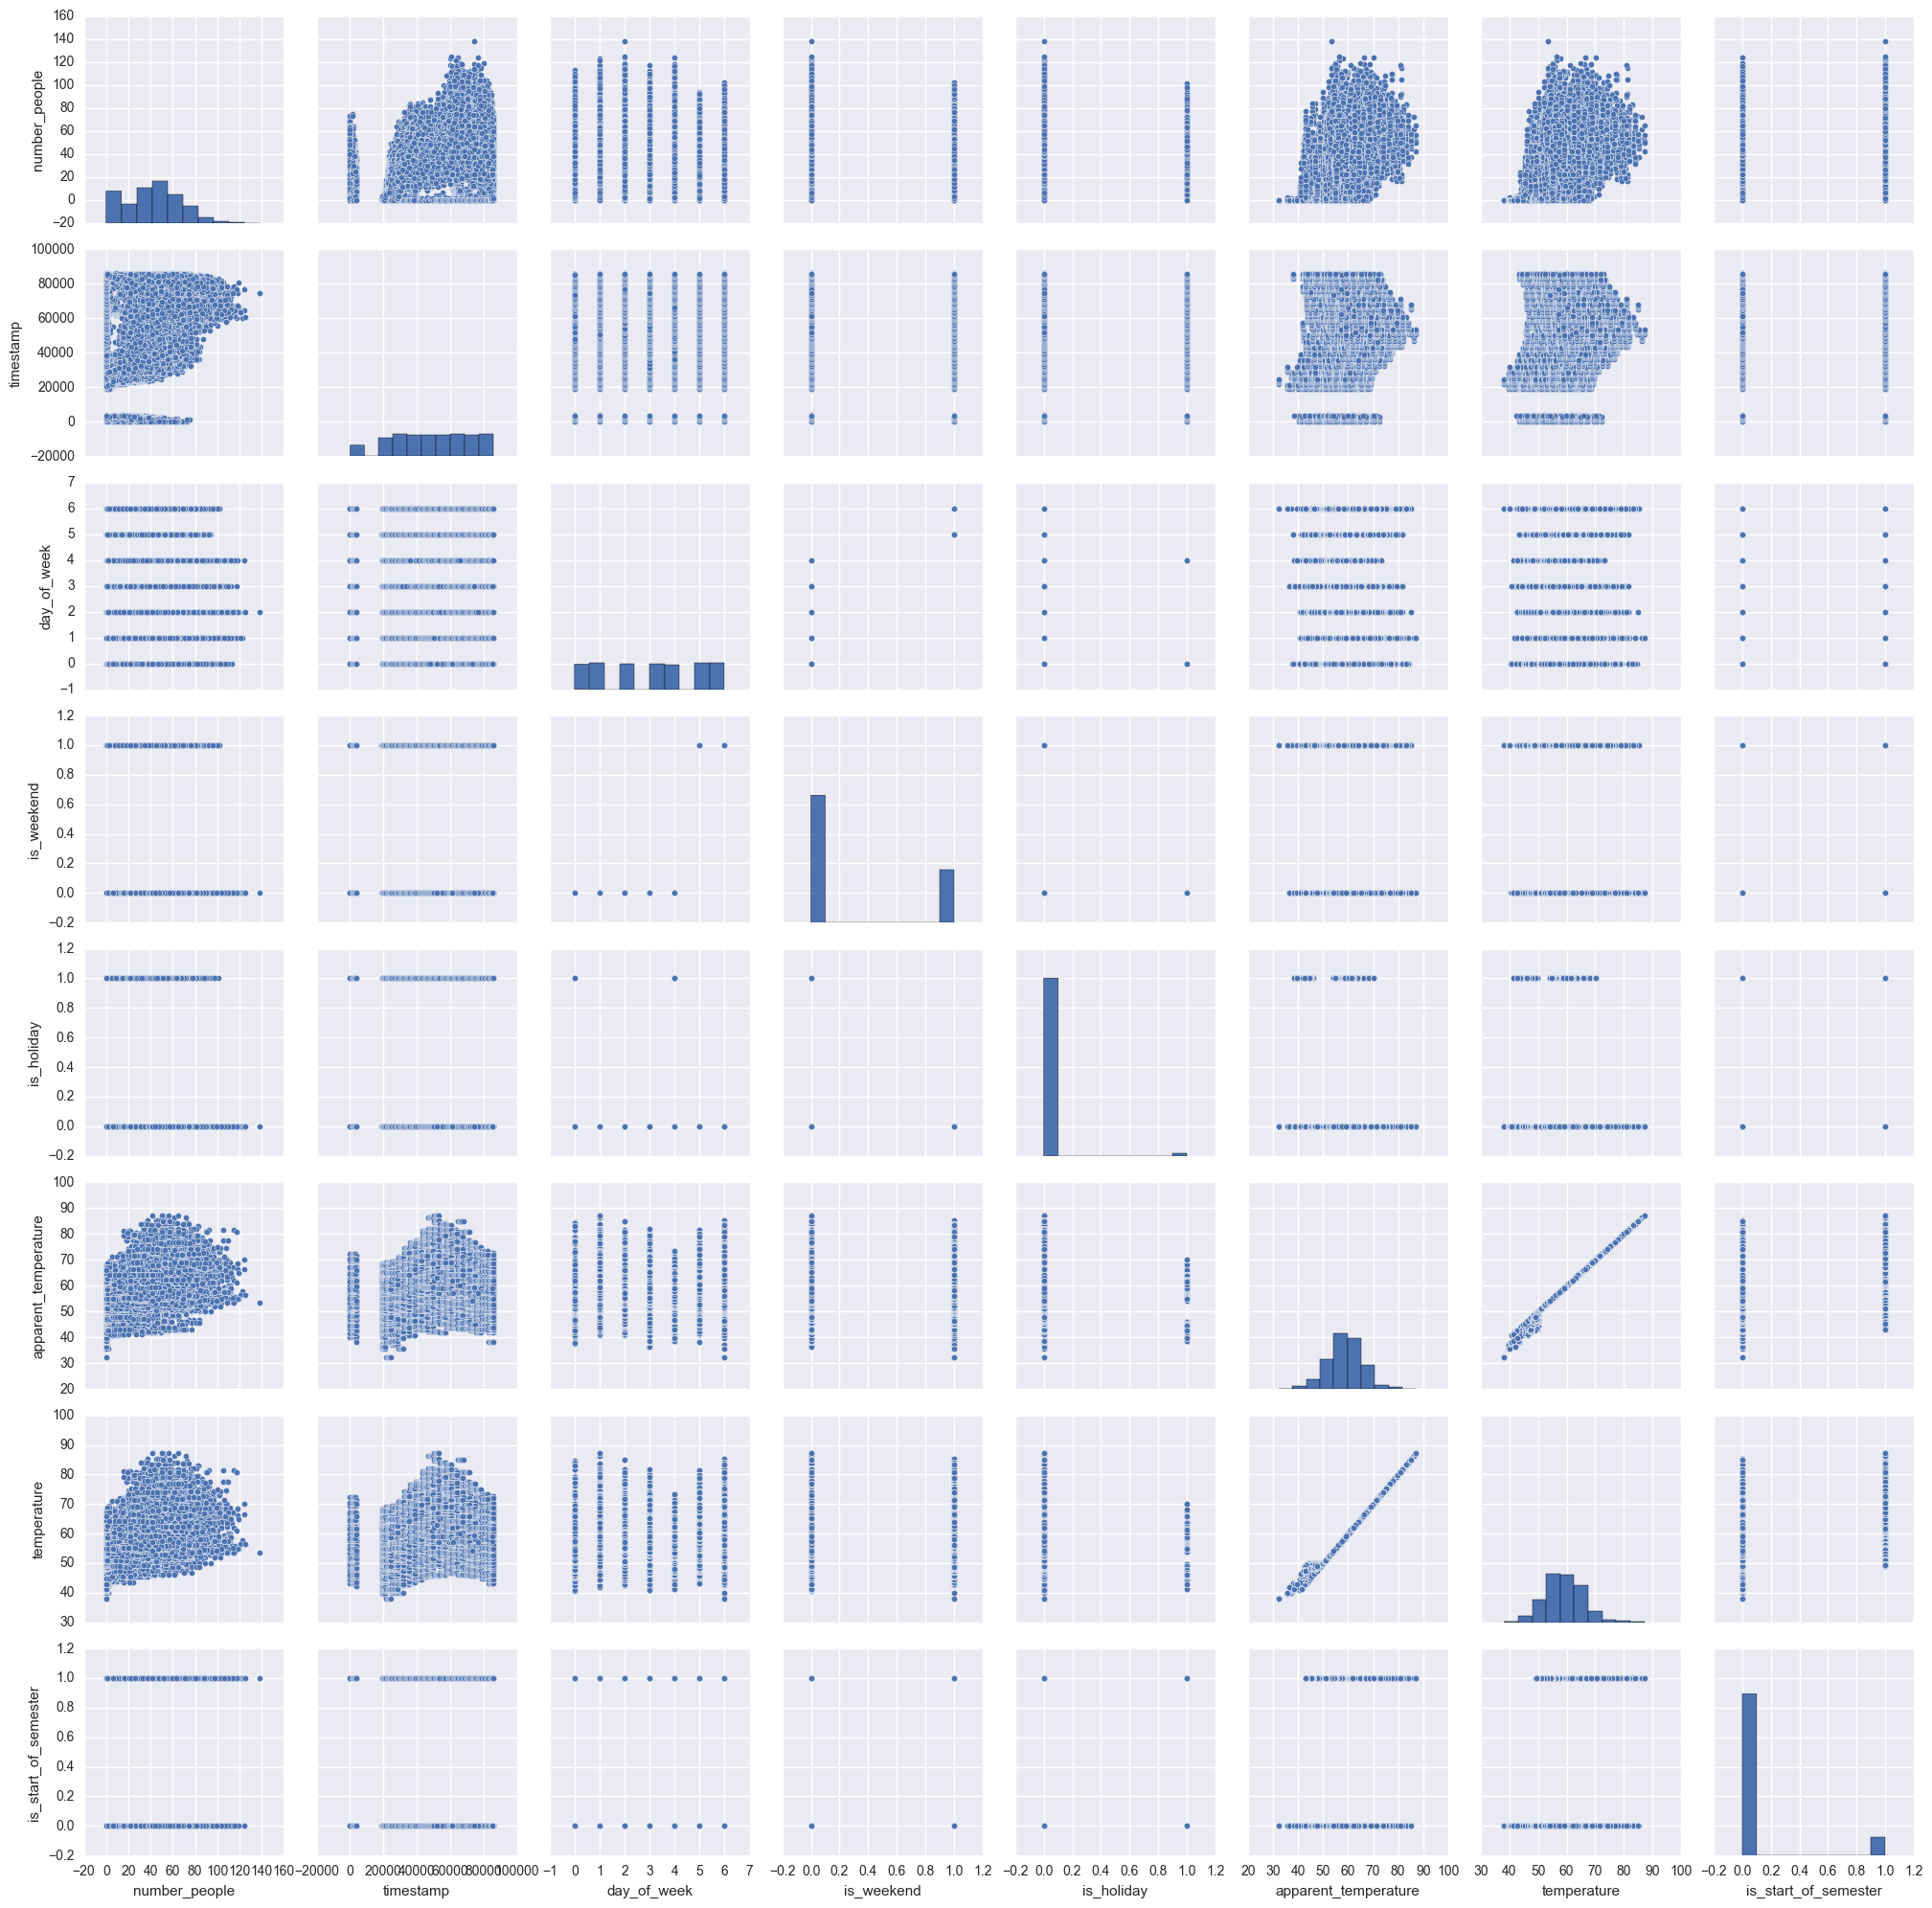

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(Gym_data)

From above pairplot few things can be found

1. number of people attending gym and temperatures are showing gaussian distribution which is good thing
2. There is some kind of relationship exiting between temperatures and number of people attending gym
3. There is strong correleation between apperent temperature and temperature (offcourse !!), so which developing predictive model, one of them has to go out.

Let's get insights into the how data is correlated 

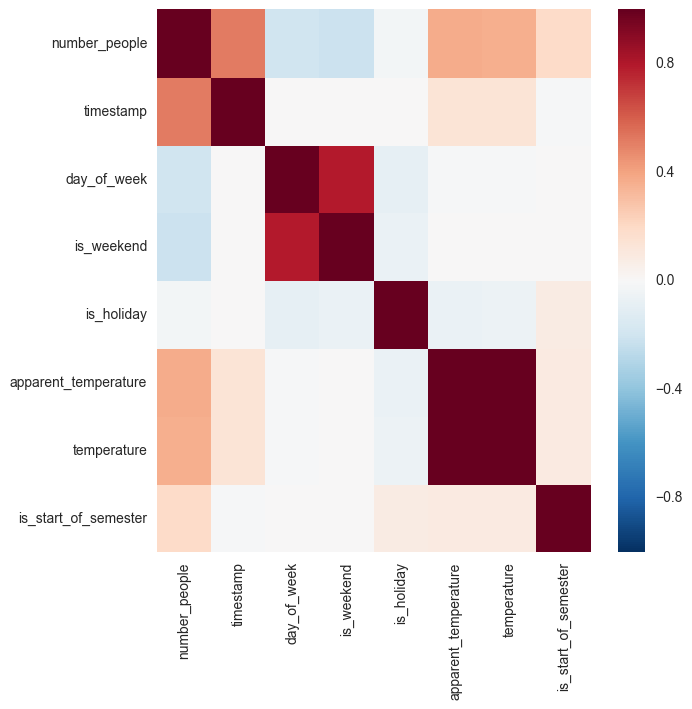

In [46]:
corrmat = Gym_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()

There is positive correlation between number of people and timestamp. Does it mean more number of people are coming at higher timestamp? Lets find out

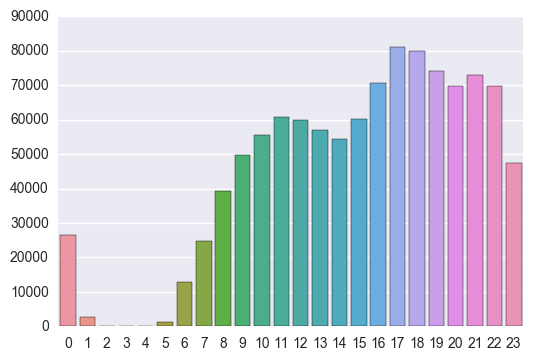

In [117]:
Bins = []
for i in range(0,24):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['timestamp']/3600 > i and row['timestamp']/3600 < i+1):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
                  
sb.barplot(list(range(24)),Bins)

Ahaaaa !! so statement "more number of people are coming at higher timestamp" is true from above graph

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Analysis - 
#### More number of people go to the gym late in the day than early
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

From pairplot there is negative correlation between day_of_week and number of people going to gym. Does it mean that more number of people go to gym on day = 0 i.e monday than and less on sunday?? Let's find out

[168947.0, 171249.0, 167431.0, 159175.0, 153625.0, 125631.0, 124101.0]


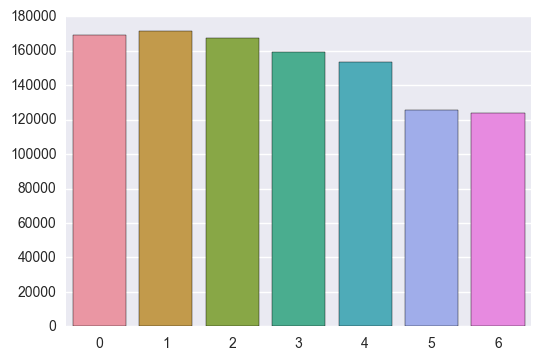

In [48]:
Bins = []
for i in range(0,7):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['day_of_week'] >= i and row['day_of_week'] < i+1):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
print(Bins)
            
                       
sb.barplot(list(range(7)),Bins)

Wohhhhh !! Bam! Early during week more number of people are going to gym and it goes steadily down till sunday.

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Analysis -
#### From Monday till sunday number of people going to gym steadily decreases
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

From correlation plot, there exists the positive correlation between number of people going to gym and temperature. Lets validate !!

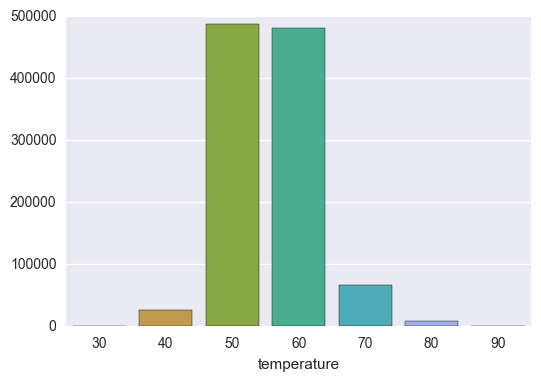

In [119]:
Bins = []
for i in range(30,100,10):
    NumberofPeople = 0
    for index, row in Gym_data.iterrows():
        if(row['temperature'] >= i and row['temperature'] < i+10):
            NumberofPeople = NumberofPeople + row['number_people']
    Bins.append((NumberofPeople))
                  
sb.barplot(list(range(30,100,10)),Bins)


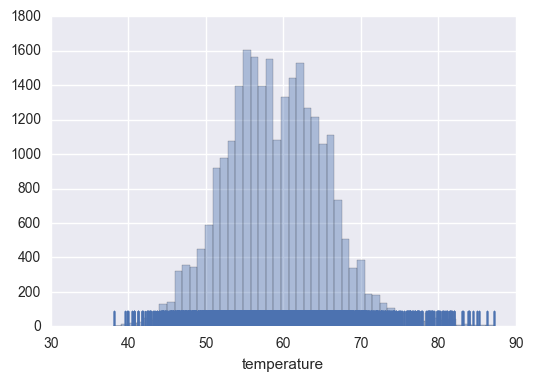

In [120]:
sb.distplot(Gym_data['temperature'], kde=False, rug=True)

So even though from barplot it seems like more people attend gym in warm weather its not true as most number of days weather remains in range 50 to 70. So the analysis that more people attend gym during 50 to 70 temperature range is not entirely correct.

Pairplot suggest that more people go to gym at start of semester. Checking ...!

In [50]:
NumberofPeopleDuringSem = 0
NumberofPeoplestartSem = 0
for index, row in Gym_data.iterrows():
    if(row['is_start_of_semester'] == 0):
        NumberofPeopleDuringSem = NumberofPeopleDuringSem + row['number_people']
    else:
        NumberofPeoplestartSem = NumberofPeoplestartSem + row['number_people']
print('Number of people at start of sem = ' + str(NumberofPeoplestartSem))
print('Number of people during sem = ' + str(NumberofPeopleDuringSem))

Number of people at start of sem = 143780.0
Number of people during sem = 926379.0


True that!! people go to gym more at start of sem. And once exams start getting close..its study time .. :)

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Analysis - 
#### At start of semester people tend to go to gym more 
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model predicting number of students attending the gym

In [96]:
from sklearn.linear_model import SGDClassifier,SGDRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [106]:
Gym_data_copy = Gym_data
y = Gym_data_copy['number_people'].values
Gym_data_copy = Gym_data_copy.drop(['number_people','apparent_temperature','is_weekend'],axis=1)
X = Gym_data_copy.values
Gym_data_copy.head()

,timestamp,day_of_week,is_holiday,temperature,is_start_of_semester
0,11,5,0,63.0,0
1,906,5,0,63.0,0
2,1207,5,0,63.0,0
3,1507,5,0,63.0,0
4,1808,5,0,63.0,0


In [107]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [112]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [109]:
sdg = SGDRegressor()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print(sdg.score(Xtest, ytest))

0.421780505401


In [110]:
radm = RandomForestRegressor()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict(Xtest)
print(radm.score(Xtest, ytest))


0.815850734448


##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Analysis - 
#### The predictive model can predict number of people attending the gym with 81% accuracy
##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [115]:
import numpy as np
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(Gym_data_copy.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], Gym_data_copy.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 timestamp (0.568334)
2. feature 3 temperature (0.267870)
3. feature 1 day_of_week (0.123760)
4. feature 4 is_start_of_semester (0.038715)
5. feature 2 is_holiday (0.001321)


##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Analysis - 
#### Below is the list of the factors affecting the number of people attending gym ranked from top to bottom in decreasing imprtance manner
1. Timestamp
2. Temperature
3. Day of week
4. Is start of semester
5. Is holiday
##### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------